In [2]:
import pandas as pd
df = pd.read_csv(r"D:\Vinay Personal\Hero Vired - Vlearn\Python\Dataset\car_prices.csv")
print("First 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nRecord count:", df.shape[0])

First 5 rows:
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 ki

In [3]:
# 1.2 Understanding the Data Structure

# Check shape (rows and columns)
print("Shape of dataset (rows, columns):")
print(df.shape)
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

# Display column names
print("\nColumn names:")
print(list(df.columns))

# Display data types
print("\nData types:")
print(df.dtypes)

Shape of dataset (rows, columns):
(558837, 16)
Rows: 558837
Columns: 16

Column names:
['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']

Data types:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


Null values per column:
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
condition       11820
odometer           94
color             749
interior          749
mmr                38
sellingprice       12
saledate           12
dtype: int64

Total nulls: 123376


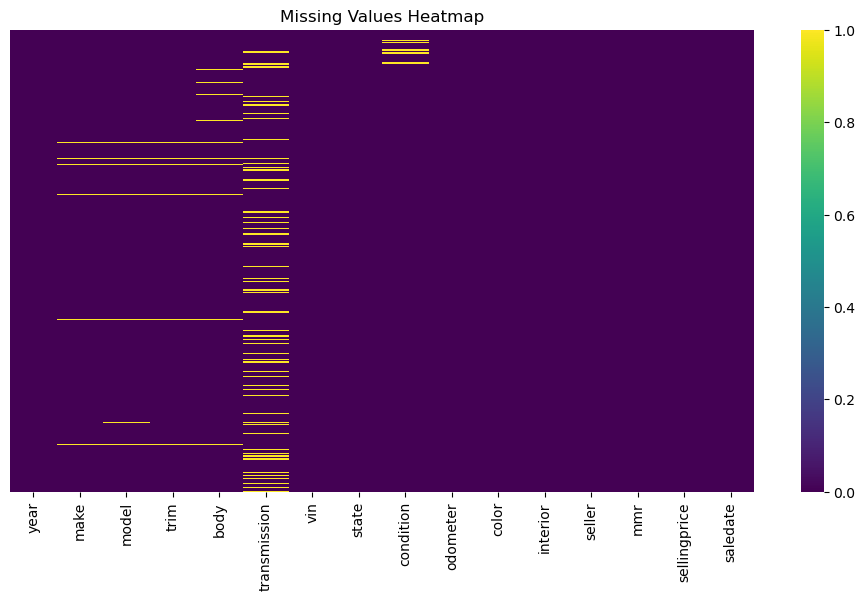

C:\Users\Vinay\AppData\Local\Temp\ipykernel_14096\594894782.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


Filled make (categorical) with 'Unknown'
Filled model (categorical) with 'Unknown'
Filled trim (categorical) with 'Unknown'
Filled body (categorical) with 'Unknown'
Filled transmission (categorical) with 'Unknown'
Filled vin (categorical) with 'Unknown'


C:\Users\Vinay\AppData\Local\Temp\ipykernel_14096\594894782.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Filled condition (numeric) with median
Filled odometer (numeric) with median
Filled color (categorical) with 'Unknown'
Filled interior (categorical) with 'Unknown'
Filled mmr (numeric) with median
Filled sellingprice (numeric) with median
Filled saledate (categorical) with 'Unknown'

After cleaning - Shape: (558837, 16)

Duplicate records: 0
No duplicates found


In [4]:
# 1.3 Missing & Anomaly Detection

# 1. Quantify nulls per column
print("Null values per column:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])  # Only show columns with nulls
print(f"\nTotal nulls: {null_counts.sum()}")

# Visualize nulls (heatmap)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 2. Resolve null values (strategy based on % missing)
for col in df.columns:
    null_pct = (df[col].isnull().sum() / len(df)) * 100
    if null_pct > 50:
        print(f"High nulls in {col} ({null_pct:.1f}%): Drop column")
        df.drop(col, axis=1, inplace=True)
    elif null_pct > 0:
        if df[col].dtype == 'object':
            df[col].fillna('Unknown', inplace=True)
            print(f"Filled {col} (categorical) with 'Unknown'")
        else:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled {col} (numeric) with median")

print(f"\nAfter cleaning - Shape: {df.shape}")

# 3. Check and remove duplicates
dup_count = df.duplicated().sum()
print(f"\nDuplicate records: {dup_count}")
if dup_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed duplicates. New shape: {df.shape}")
else:
    print("No duplicates found")


In [6]:
# Question 2: Data Frames Queries

print("=== 2.1 Average, min, max car price ===")
selling_price_col = 'sellingprice'  # adjust if different
print("Avg selling price:", df[selling_price_col].mean())
print("Min selling price:", df[selling_price_col].min())
print("Max selling price:", df[selling_price_col].max())

print("\n=== 2.2 Unique colors ===")
print(df['color'].unique())

print("\n=== 2.3 Unique brands and models ===")
print("Unique brands (make):", df['make'].nunique())
print("Unique models:", df['model'].nunique())

print("\n=== 2.4 Cars > $165000 ===")
high_price = df[df[selling_price_col] > 165000]
print(high_price[['make', 'model', selling_price_col]].head())

print("\n=== 2.5 Top 5 most frequent models ===")
print(df['model'].value_counts().head())

print("\n=== 2.6 Avg price by brand ===")
print(df.groupby('make')[selling_price_col].mean().round(2).head(10))

print("\n=== 2.7 Min price by interior ===")
print(df.groupby('interior')[selling_price_col].min().round(2))

print("\n=== 2.8 Highest odometer by year ===")
print(df.groupby('year')['odometer'].max().sort_values(ascending=False))

print("\n=== 2.9 Car age (2025) ===")
df['car_age'] = 2025 - df['year']
print("Car age column created. Sample:")
print(df[['year', 'car_age']].head())

print("\n=== 2.10 Condition >=48 & odometer >90000 ===")
filtered = df[(df['condition'] >= 48) & (df['odometer'] > 90000)]
print("Count:", len(filtered))

print("\n=== 2.11 Higher prices for newer cars (year>2013) by state ===")
newer_cars = df[df['year'] > 2013].groupby('state')[selling_price_col].mean()
print(newer_cars.sort_values(ascending=False).head())

print("\n=== 2.12 Value for money (excellent condition top 20%) ===")
top_condition = df['condition'].quantile(0.8)  # top 20%
excellent = df[df['condition'] >= top_condition]
value_money = excellent.groupby('make')[selling_price_col].mean().sort_values()
print(value_money.head())


=== 2.1 Average, min, max car price ===
Avg selling price: 13611.326356343621
Min selling price: 1.0
Max selling price: 230000.0

=== 2.2 Unique colors ===
['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' 'Unknown' 'orange'
 'off-white' 'turquoise' 'pink' 'lime' '4802' '9410' '1167' '2172' '14872'
 '12655' '15719' '6388' '16633' '11034' '2711' '6864' '339' '18384' '9887'
 '9837' '20379' '20627' '721' '6158' '2817' '5705' '18561' '2846' '9562'
 '5001']

=== 2.3 Unique brands and models ===
Unique brands (make): 97
Unique models: 974

=== 2.4 Cars > $165000 ===
                 make    model  sellingprice
125095    Rolls-Royce    Ghost      169500.0
344905           Ford   Escape      230000.0
446949  Mercedes-Benz  S-Class      173000.0
538347    Rolls-Royce    Ghost      167000.0
545523    Rolls-Royce    Ghost      171500.0

=== 2.5 Top 5 most frequent models ===
model
Altima    19349
F-150     14479
Fusion    129

=== 3.1 Correlation Heatmap ===


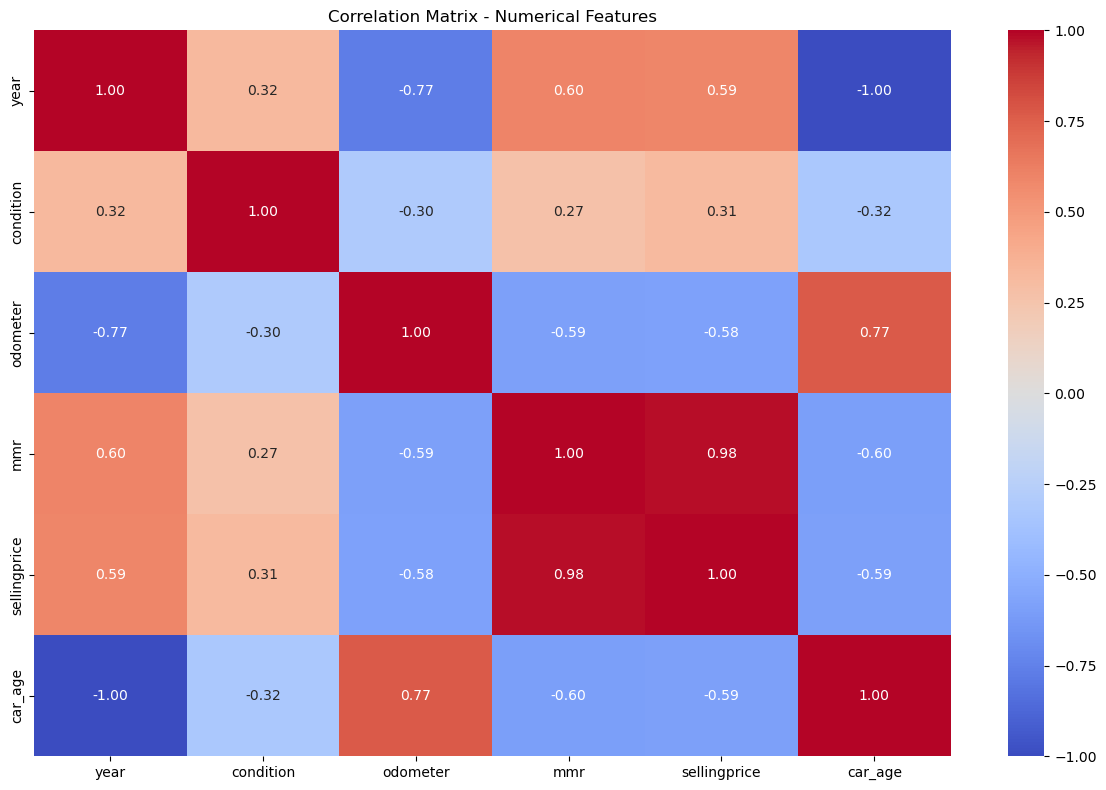


=== 3.2 Avg Price by Year (Scatter) ===


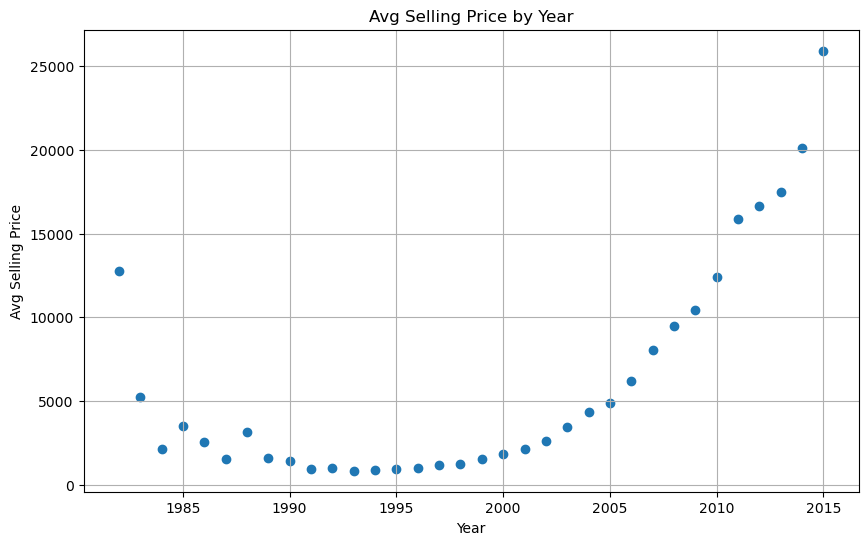

Pattern: Prices trend up

=== 3.3 Avg Price vs Odometer ===


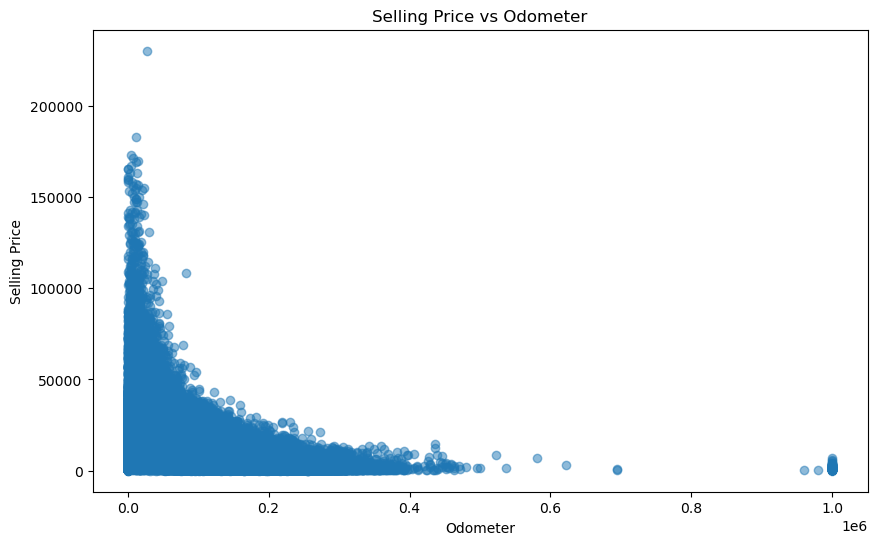

Trend: Higher odometer usually lower price

=== 3.4 Cars by State ===


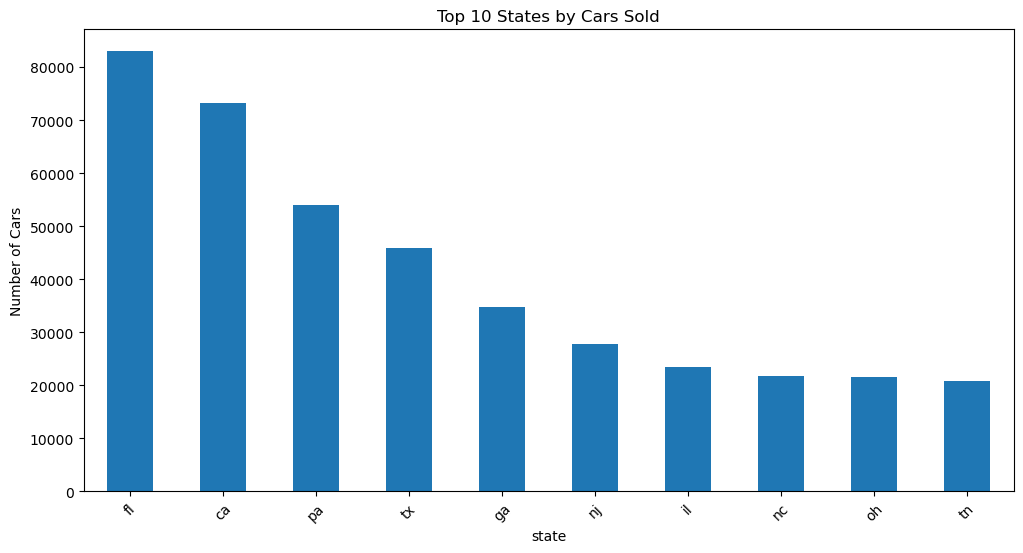

Top 3 states: ['fl', 'ca', 'pa']

=== 3.5 Avg Price by Condition (5 bins) ===


C:\Users\Vinay\AppData\Local\Temp\ipykernel_14096\3851808287.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_condition = df.groupby('condition_bin')[selling_price_col].mean()


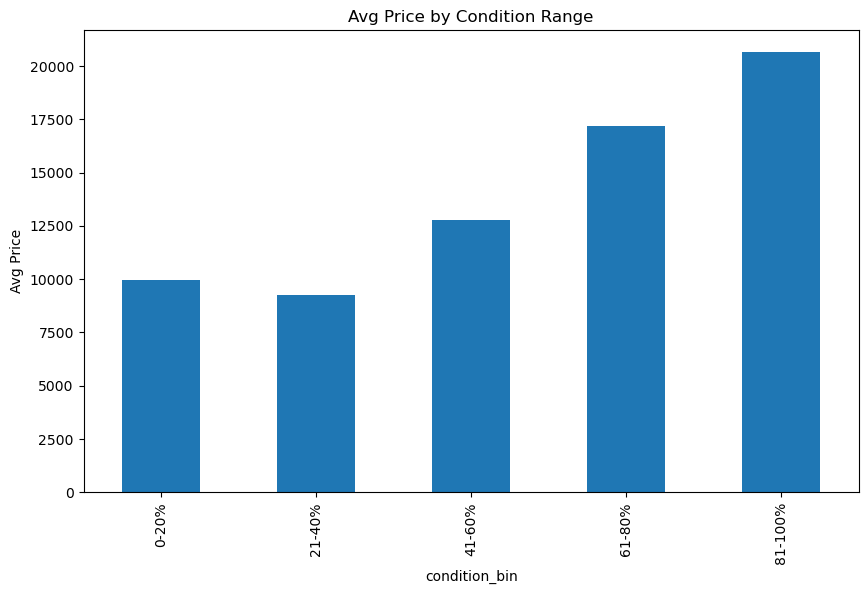

Insight: Higher condition = higher avg price

=== 3.6 Cars by Condition (10 bins) ===


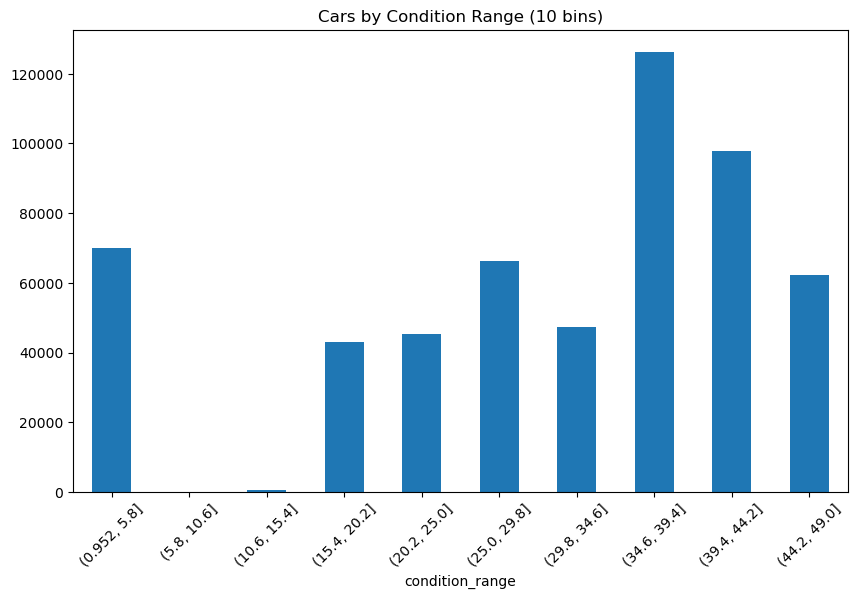

Insight: Most cars in mid-high condition ranges

=== 3.7 Price Distribution by Color ===


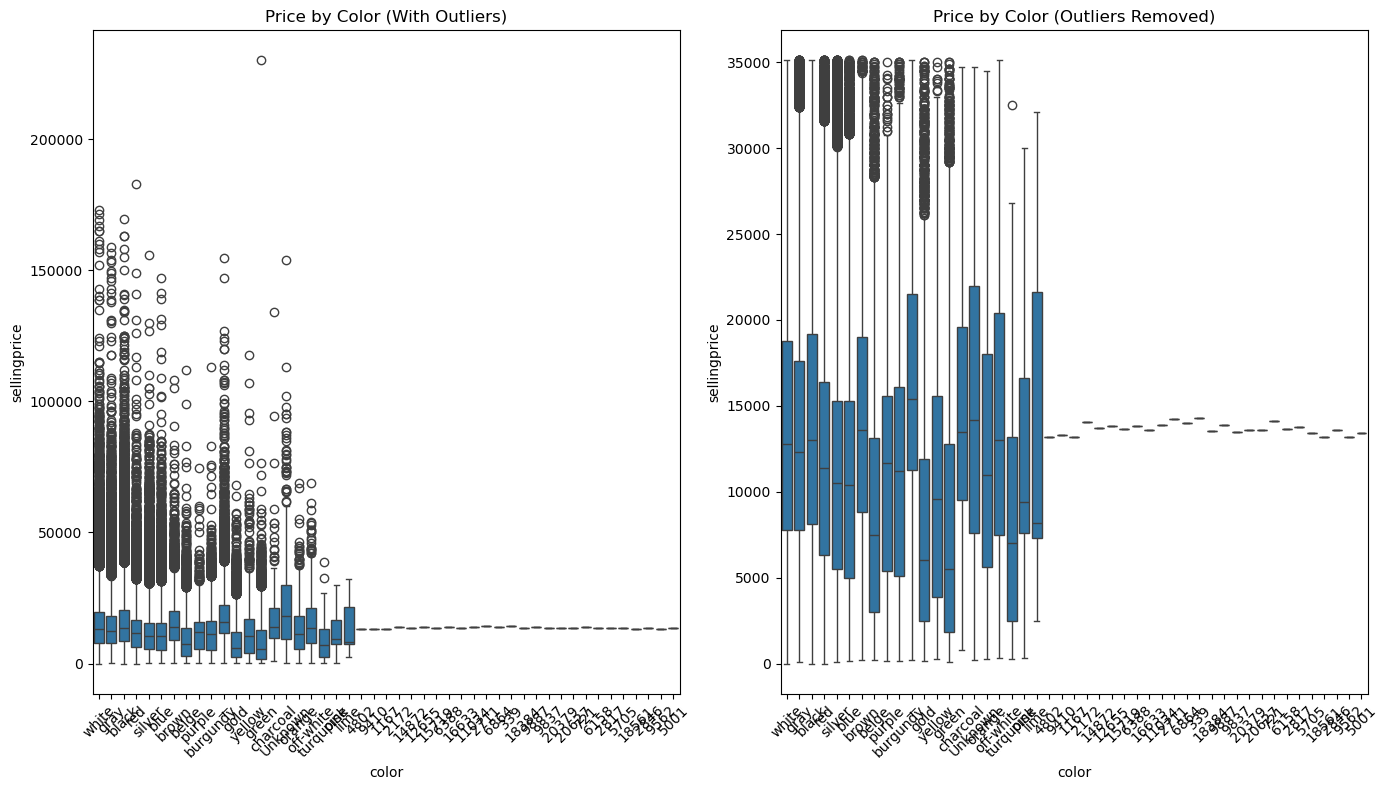

Insight: Some colors have higher median prices, wide spreads


In [7]:
# Question 3: Data Visualization and Insights
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

selling_price_col = 'sellingprice'  # adjust column name if needed

# 3.1 Correlation heatmap (numerical features only)
print("=== 3.1 Correlation Heatmap ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.show()

# 3.2 Avg price by year (scatter plot recommended)
print("\n=== 3.2 Avg Price by Year (Scatter) ===")
avg_year = df.groupby('year')[selling_price_col].mean()
plt.figure(figsize=(10, 6))
plt.scatter(avg_year.index, avg_year.values)
plt.xlabel('Year')
plt.ylabel('Avg Selling Price')
plt.title('Avg Selling Price by Year')
plt.grid(True)
plt.show()
print("Pattern: Prices trend", "up" if avg_year.iloc[-1] > avg_year.iloc[0] else "down")

# 3.3 Avg price by odometer (scatter)
print("\n=== 3.3 Avg Price vs Odometer ===")
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df[selling_price_col], alpha=0.5)
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.title('Selling Price vs Odometer')
plt.show()
print("Trend: Higher odometer usually lower price")

# 3.4 Cars sold by state (bar + top 3)
print("\n=== 3.4 Cars by State ===")
state_counts = df['state'].value_counts().head(10)
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Top 10 States by Cars Sold')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()
print("Top 3 states:", state_counts.head(3).index.tolist())

# 3.5 Avg price by condition ranges (5 bins)
print("\n=== 3.5 Avg Price by Condition (5 bins) ===")
df['condition_bin'] = pd.qcut(df['condition'], q=5, labels=['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
avg_condition = df.groupby('condition_bin')[selling_price_col].mean()
plt.figure(figsize=(10, 6))
avg_condition.plot(kind='bar')
plt.title('Avg Price by Condition Range')
plt.ylabel('Avg Price')
plt.show()
print("Insight: Higher condition = higher avg price")

# 3.6 Cars by condition ranges (10 bins)
print("\n=== 3.6 Cars by Condition (10 bins) ===")
df['condition_range'] = pd.cut(df['condition'], bins=10)
count_condition = df['condition_range'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
count_condition.plot(kind='bar')
plt.title('Cars by Condition Range (10 bins)')
plt.xticks(rotation=45)
plt.show()
print("Insight: Most cars in mid-high condition ranges")

# 3.7 Boxplot by color (with/without outliers)
print("\n=== 3.7 Price Distribution by Color ===")
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='color', y=selling_price_col)
plt.title('Price by Color (With Outliers)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Remove outliers (IQR method)
Q1 = df[selling_price_col].quantile(0.25)
Q3 = df[selling_price_col].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df[selling_price_col] >= Q1 - 1.5*IQR) & (df[selling_price_col] <= Q3 + 1.5*IQR)]
sns.boxplot(data=df_no_outliers, x='color', y=selling_price_col)
plt.title('Price by Color (Outliers Removed)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Insight: Some colors have higher median prices, wide spreads")